In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Cleaning 

In [2]:
# used to read csv file 
df = pd.read_csv('BigBasket Products.csv')

In [3]:
# show only top 4 data
df.head(4)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...


In [4]:
# information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [5]:
df.shape

(27555, 10)

In [6]:
# finding mean , mode etc 
df.describe(include='all')

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
count,27555.00000,27554,27555,27555,27554,27555.000000,27555.000000,27555,18929.000000,27440
unique,NaN,23540,11,90,2313,NaN,NaN,426,NaN,21944
top,NaN,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,NaN,NaN,Face Care,NaN,A brand inspired by the Greek goddess of victo...
freq,NaN,26,7867,2294,638,NaN,NaN,1508,NaN,47
mean,13778.00000,NaN,NaN,NaN,NaN,322.514808,382.056664,NaN,3.943410,NaN
std,7954.58767,NaN,NaN,NaN,NaN,486.263116,581.730717,NaN,0.739063,NaN
min,1.00000,NaN,NaN,NaN,NaN,2.450000,3.000000,NaN,1.000000,NaN
25%,6889.50000,NaN,NaN,NaN,NaN,95.000000,100.000000,NaN,3.700000,NaN
50%,13778.00000,NaN,NaN,NaN,NaN,190.000000,220.000000,NaN,4.100000,NaN
75%,20666.50000,NaN,NaN,NaN,NaN,359.000000,425.000000,NaN,4.300000,NaN


In [7]:
# we do not have any duplicates value 
df.duplicated().sum()

0

In [8]:
# percentage of null value 
df.isnull().sum()/len(df) * 100

index            0.000000
product          0.003629
category         0.000000
sub_category     0.000000
brand            0.003629
sale_price       0.000000
market_price     0.000000
type             0.000000
rating          31.304663
description      0.417347
dtype: float64

In [9]:
# finding null values 
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [10]:
# replace with null values bcoz of maximun percentage of null values 
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [13]:
df.head(3)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."


#### - Which product categories have the highest and lowest average selling prices?
#### - for about selling price 

                    category  sale_price
0                  Baby Care  535.169409
9     Kitchen, Garden & Pets  507.862527
2           Beauty & Hygiene  418.972981
8       Gourmet & World Food  320.308283
5          Eggs, Meat & Fish  290.208198
3                  Beverages  240.177832
4       Cleaning & Household  226.431741
6   Foodgrains, Oil & Masala  192.250844
1      Bakery, Cakes & Dairy  142.802750
10    Snacks & Branded Foods  129.621429
7        Fruits & Vegetables   50.903525


C:\Users\smate\AppData\Local\Temp\ipykernel_29280\3372267672.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_product_selling_price, x='category', y='sale_price', palette='viridis')


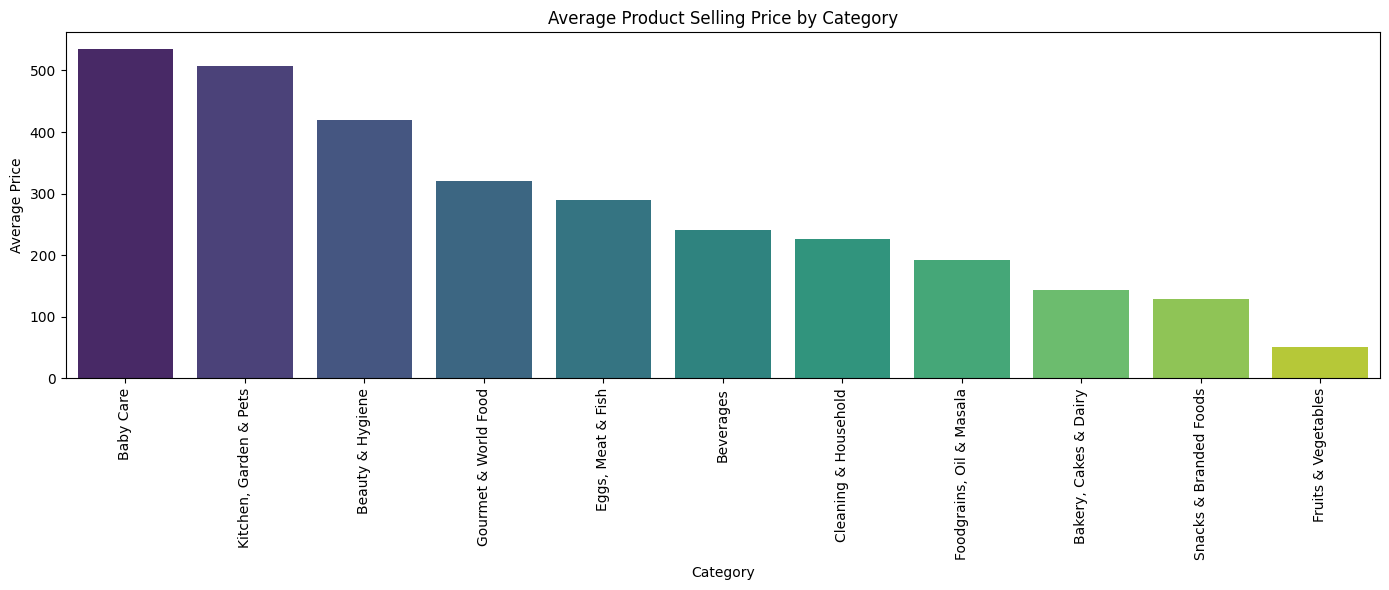

In [14]:
avg_product_selling_price = df.groupby(by = 'category')['sale_price'].mean().reset_index()
avg_product_selling_price= avg_product_selling_price.sort_values(by='sale_price', ascending=False)
print(avg_product_selling_price)


# visualization 
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_product_selling_price, x='category', y='sale_price', palette='viridis')
plt.title("Average Product Selling Price by Category")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

#### - Which product categories have the highest and lowest average maket prices?
#### - for about market price 

                    category  market_price
9     Kitchen, Garden & Pets    660.226109
0                  Baby Care    596.880131
2           Beauty & Hygiene    493.869045
8       Gourmet & World Food    359.081332
5          Eggs, Meat & Fish    327.594244
3                  Beverages    272.754824
4       Cleaning & Household    262.454165
6   Foodgrains, Oil & Masala    228.180414
1      Bakery, Cakes & Dairy    157.881316
10    Snacks & Branded Foods    140.807501
7        Fruits & Vegetables     64.452878


C:\Users\smate\AppData\Local\Temp\ipykernel_29280\1139926612.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_product_market_price, x='category', y='market_price', palette='viridis')


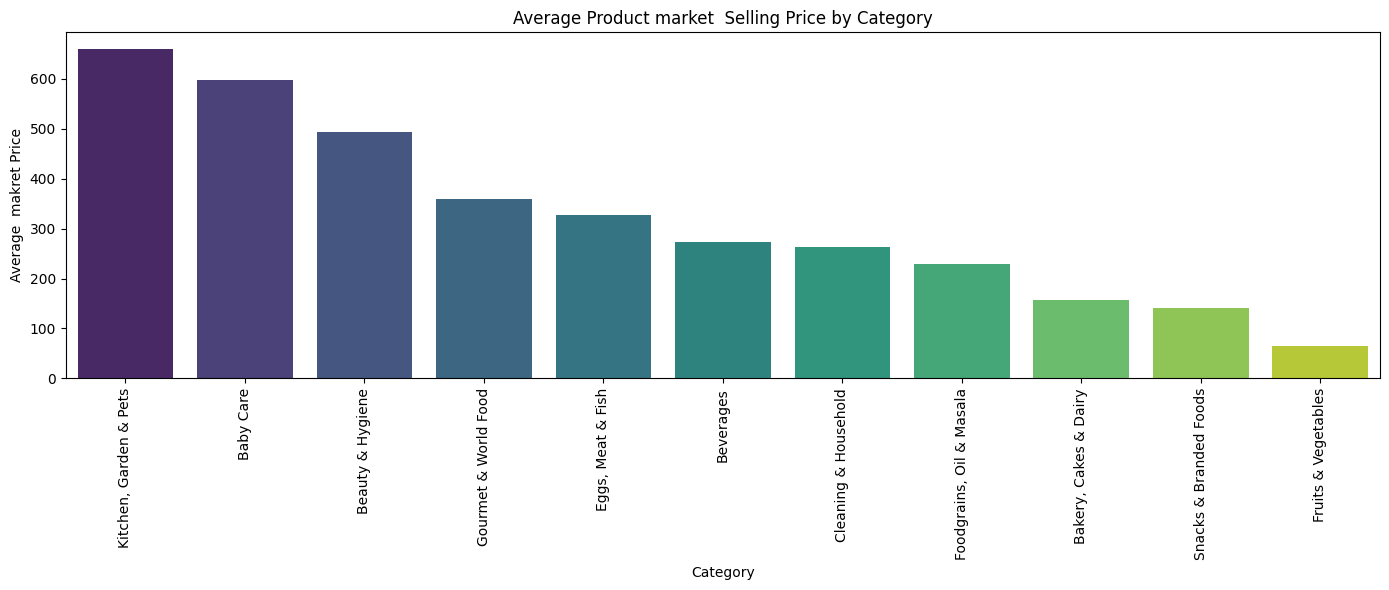

In [15]:
avg_product_market_price = df.groupby(by = 'category')['market_price'].mean().reset_index()
avg_product_market_price=avg_product_market_price.sort_values(by='market_price', ascending=False)
print(avg_product_market_price)


# visualization
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_product_market_price, x='category', y='market_price', palette='viridis')
plt.title("Average Product market  Selling Price by Category")
plt.xticks(rotation=90)
plt.ylabel("Average  makret Price")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

#### which top 5 product has the highest selling 


                        product  market_price
7166     Extra Virgin Olive Oil       28782.0
14450  Olive Oil - Extra Virgin       26846.0
7154      Extra Light Olive Oil       18658.0
14463          Olive Pomace Oil       18117.0
6843    Eau De Toilette For Men       17250.0


C:\Users\smate\AppData\Local\Temp\ipykernel_29280\3821109654.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_5_product, x='product', y='market_price', palette='mako')


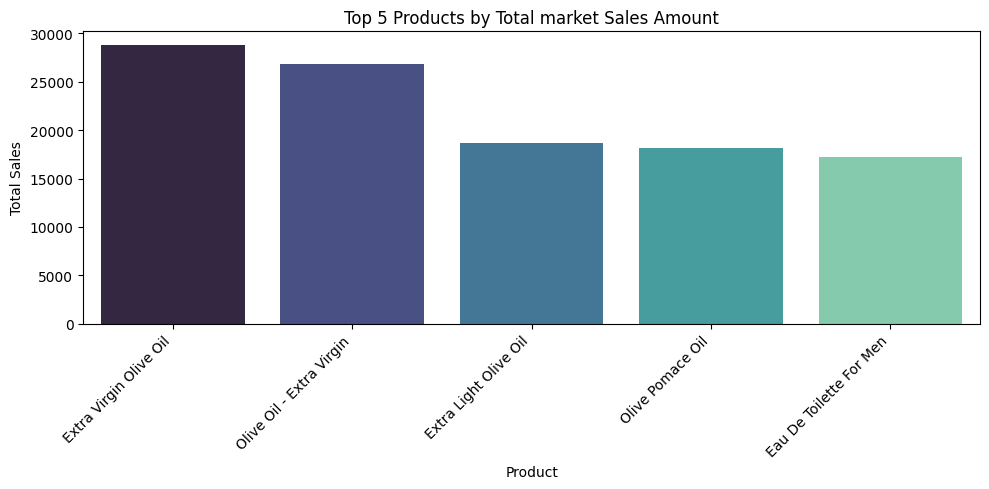

In [16]:
Top_5_product=df.groupby(by = 'product')['market_price'].sum().reset_index()
Top_5_product= Top_5_product.sort_values(by='market_price',  ascending=False).head(5)
print(Top_5_product)


plt.figure(figsize=(10, 5))
sns.barplot(data=Top_5_product, x='product', y='market_price', palette='mako')
plt.title("Top 5 Products by Total market Sales Amount")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

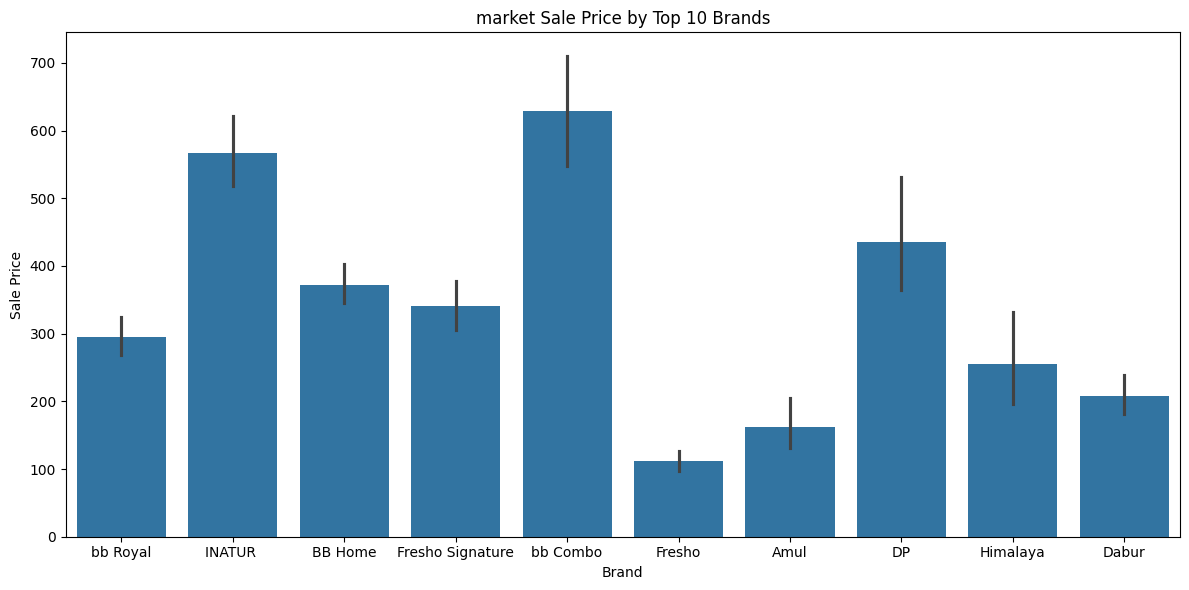

In [17]:
top_brands = df['brand'].value_counts().head(10).index
top_brand_data = df[df['brand'].isin(top_brands)]

# plotting 
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brand_data, x='brand', y='market_price')
plt.title('market Sale Price by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()


#### which top 5 brand has the highest rating 


In [18]:
Top_5_product=df.groupby(by = 'brand')['rating'].max().sort_values(ascending=False).reset_index()
Top_5_product.head()

,brand,rating
0,Parachute,5.0
1,Natures Essence,5.0
2,Nature Way,5.0
3,Naturals,5.0
4,Natural Vibes,5.0


#### which top 5 product has the highest discount 

In [19]:
df['discount_percent'] =round(((df['market_price'] - df['sale_price'])/df['market_price']) * 100,2)
Top_5_product=df.groupby(by = 'product')['discount_percent'].max().sort_values(ascending=False).reset_index()
Top_5_product.head()

,product,discount_percent
0,Curry Leaves,83.67
1,Fruit & Vegetables Hand Juicer,82.51
2,Small Silicone Spatula With Plastic Handle - A...,81.20
3,Decorative Party Light Big Star String LED Lig...,80.98
4,NHS 860 Temperature Control Professional Hair ...,80.50


#### - What categories have the widest price dispersion (standard deviation)?


In [20]:
standard_deviation_product = df.groupby(by='category')['market_price'].std().reset_index()
print(standard_deviation_product.sort_values(by='market_price', ascending=False).head(1))

                 category  market_price
9  Kitchen, Garden & Pets    880.379032


#### adding new column for finding the price group 

In [21]:
df['price_group'] = pd.cut(df['sale_price'],
                           bins=[0, 50, 100, 200, 500, 1000, df['sale_price'].max()],
                           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Premium'])


#### new column that we can see the product graml , ml kg etc..

In [22]:
def convert_to_grams(value):
    if not isinstance(value, str):
        return None

    value = value.lower().replace(" ", "").strip()

    try:
        if 'kg' in value:
            return float(value.replace('kg', '')) * 1000
        elif 'g' in value:
            return float(value.replace('g', ''))
        elif 'l' in value and not 'ml' in value:
            return float(value.replace('l', '')) * 1000
        elif 'ml' in value:
            return float(value.replace('ml', ''))
        else:
            return None  # Invalid or unknown unit
    except:
        return None  # Could not convert to float

# Only keep pack_info that look like valid size strings
df['pack_info'] = df['product'].str.extract(r'(\d+\.?\d*\s?(ml|g|kg|l|ML|G|KG|L))', expand=False)[0]

# Apply the cleaned function
df['pack_size_gml'] = df['pack_info'].apply(convert_to_grams)

# Drop rows where size couldn't be parsed
df = df.dropna(subset=['pack_size_gml'])
df.head(1)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount_percent,price_group,pack_info,pack_size_gml
84,85,Exo Dishwash Bar- Round 700 gm Box + Pril Dish...,Cleaning & Household,Detergents & Dishwash,bb Combo,95.0,114.0,Dishwash Bars & Powders,3.94341,Exo Dish Shine Round makes your vessels odorou...,16.67,Low,700 g,700.0


#### - Can we identify clusters or groups based on price, category, and pack size?

In [23]:
df.groupby(['product', 'category', 'pack_info'])['pack_size_gml'].agg(['mean','max', 'size' ]).reset_index()

,product,category,pack_info,mean,max,size
0,100% Juice - Orange 1 lt + Apple 1 lt + Mixe...,Beverages,1 l,1000.0,1000.0,1
1,100% Melamine 750 ml Mixing Bowl With Anti Ski...,"Kitchen, Garden & Pets",750 ml,750.0,750.0,1
2,100% Melamine 750 ml Mixing Bowl With Anti Ski...,"Kitchen, Garden & Pets",750 ml,750.0,750.0,1
3,100% Natural & Healthy Snacks - Carrot & Cumin...,Baby Care,50G,50.0,50.0,1
4,"100% Pure Honey, 1 kg + Corn Flakes Classic, 4...",Snacks & Branded Foods,1 kg,1000.0,1000.0,2
...,...,...,...,...,...,...
721,bb Popular Sona Masoori Raw Rice 10kg + Toor D...,"Foodgrains, Oil & Masala",10kg,10000.0,10000.0,2
722,bb Royal Idli Rice 5kg + Gota Urad 1kg + Raw P...,"Foodgrains, Oil & Masala",5kg,5000.0,5000.0,2
723,bb Royal Sona Masoori Raw Rice 10kg + Toor Dal...,"Foodgrains, Oil & Masala",10kg,10000.0,10000.0,3
724,bb Royal Thin Poha 1Kg + Besan Flour + Ordinar...,"Foodgrains, Oil & Masala",1kg,1000.0,1000.0,2


### selling price distribution by category 

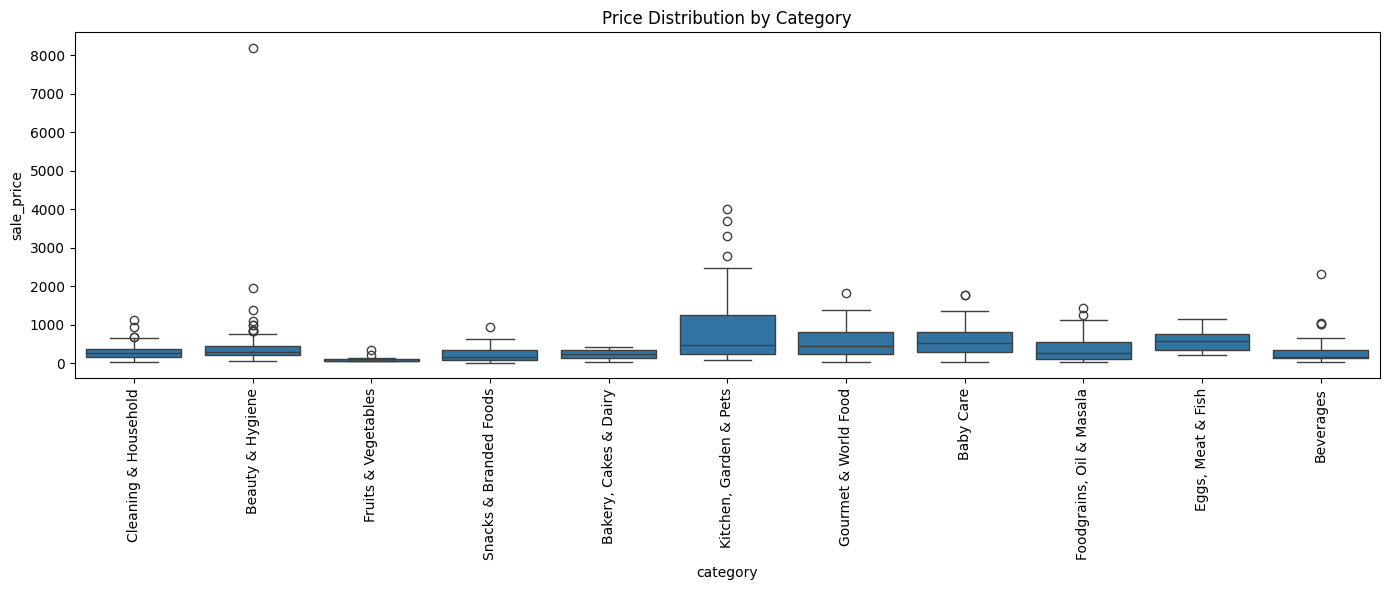

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='category', y='sale_price')
plt.title("Price Distribution by Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Total Sale Price vs. Total Market Price per Product


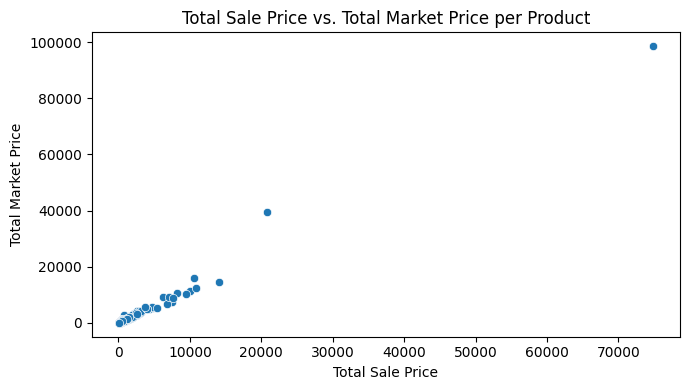

In [25]:
grouped_df = df.groupby('brand')[['sale_price', 'market_price']].sum().reset_index()

# Plot scatter plot
plt.figure(figsize=(7, 4))
sns.scatterplot(x='sale_price', y='market_price', data=grouped_df)
plt.title('Total Sale Price vs. Total Market Price per Product')
plt.xlabel('Total Sale Price')
plt.ylabel('Total Market Price')
plt.tight_layout()
plt.show()


#### finding the relation 

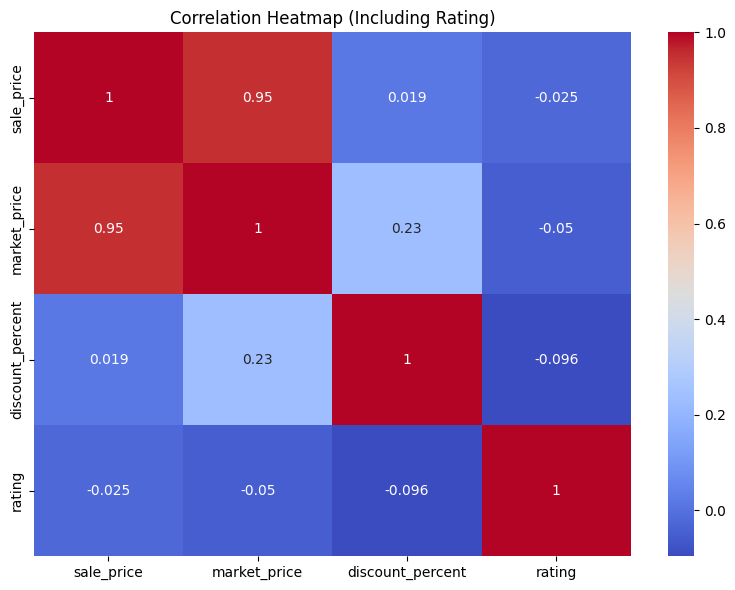

In [26]:

# Select relevant numeric columns
numeric_cols = ['sale_price', 'market_price', 'discount_percent', 'rating']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', )
plt.title('Correlation Heatmap (Including Rating)')
plt.tight_layout()
plt.show()


#### Distribution of market Prices

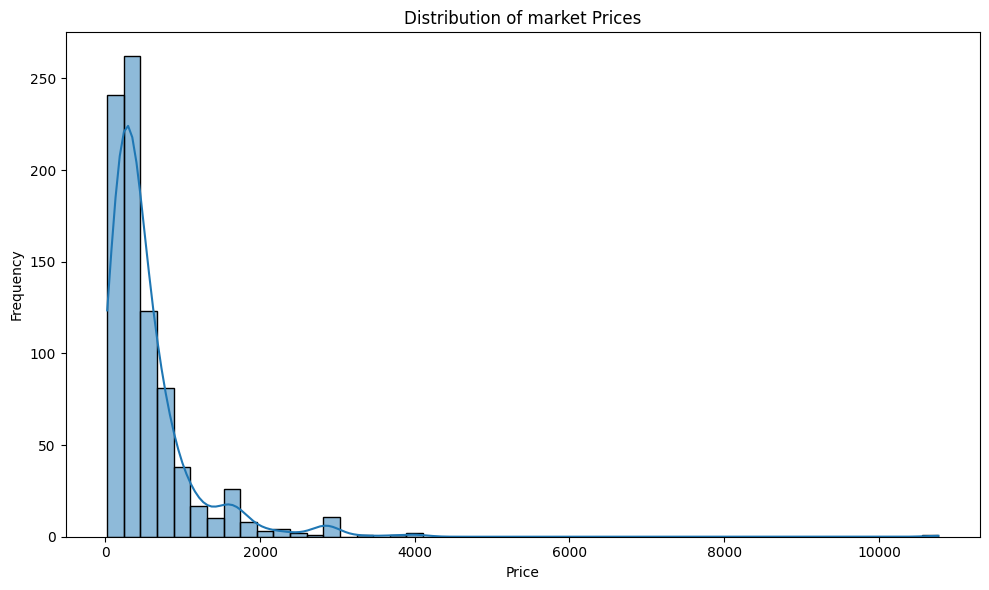

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['market_price'], bins=50, kde=True)
plt.title("Distribution of market Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()